In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import nltk

In [2]:
# Cleaning Text Library
from nltk.stem.porter import PorterStemmer 

In [15]:
# Read Data
df = pd.read_csv('train.txt' ,header=None, sep=";", names = ['text' , 'emotion'])
df = df.reset_index(drop=True)

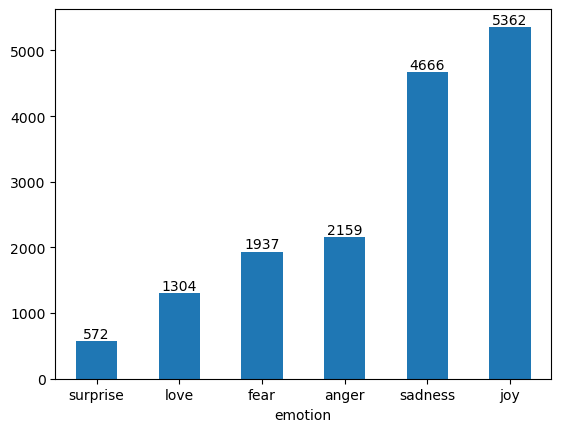

In [43]:
emotion = df.emotion.value_counts().sort_values(ascending=True)
ax = emotion.plot(kind='bar')
for index, value in enumerate(emotion):
    ax.text(index, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=0)
plt.show()

In [24]:
df['length'] = [len(text) for text in df['text']]

<Axes: xlabel='length', ylabel='Count'>

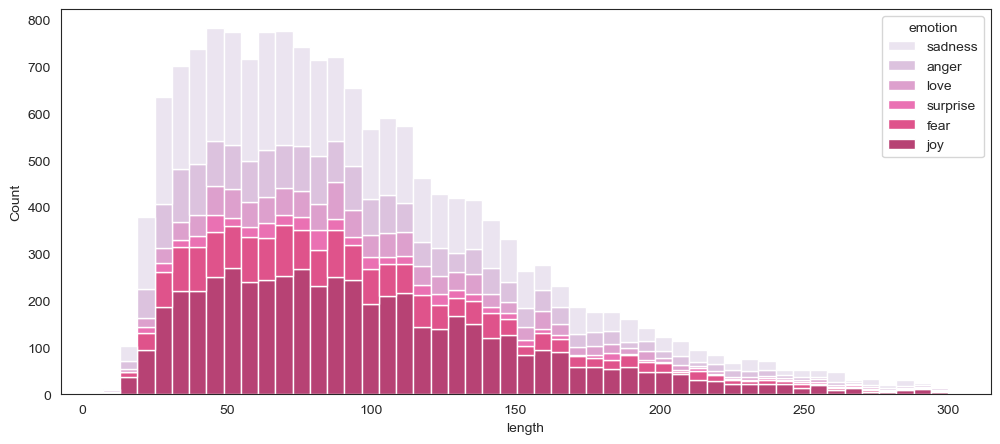

In [38]:
plt.figure(figsize=(12,5))
sns.set_style('white')
sns.histplot(x='length' , hue='emotion',data=df, multiple='stack',palette='PuRd' ,lw=1)

In [41]:
emotion = " ".join(df['text'])

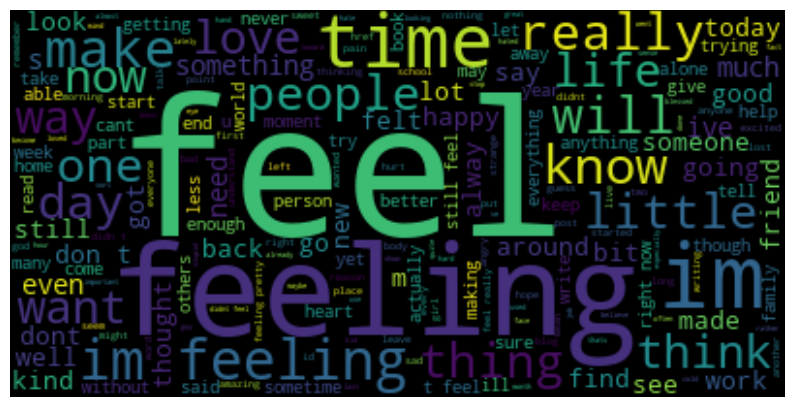

In [47]:
plt.figure(figsize=(10,6))
wordcloud = WordCloud().generate(emotion)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
# Train data

In [54]:
df['emotion'].value_counts()

emotion
2    5362
4    4666
0    2159
1    1937
3    1304
5     572
Name: count, dtype: int64

In [60]:
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['text'] = df['text'].apply(clean_text)

In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['emotion'] = lb.fit_transform(df['emotion'])

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [63]:
vector = TfidfVectorizer()

In [69]:
X = vector.fit_transform(df['text'])
y = df['emotion']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [74]:
Rmb = RandomForestClassifier()
Rmb.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
pred = Rmb.predict(X_test)

In [76]:
print(accuracy_score(y_test,pred))

0.8460416666666667


In [78]:
classfier = {
    'Random Classfier':RandomForestClassifier(),
    'MultinomialNB':MultinomialNB(),
    'SVC':SVC()
}

for name , clf in classfier.items():
    print(f'=========={name}==========')
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print(f'===============Accuracy Rate=============\n')
    print(accuracy_score(y_test,pred))
    print(f'===============Classifaction Reoprt=============\n')
    print(classification_report(y_test,pred))
    

==========Random Classfier==========
===============Accuracy Rate=============

0.84875
===============Classifaction Reoprt=============

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       672
           1       0.80      0.86      0.83       566
           2       0.85      0.88      0.87      1582
           3       0.74      0.69      0.71       372
           4       0.91      0.87      0.89      1441
           5       0.73      0.71      0.72       167

    accuracy                           0.85      4800
   macro avg       0.81      0.81      0.81      4800
weighted avg       0.85      0.85      0.85      4800

==========MultinomialNB==========
===============Accuracy Rate=============

0.650625
===============Classifaction Reoprt=============

              precision    recall  f1-score   support

           0       0.97      0.27      0.42       672
           1       0.90      0.22      0.36       566
           2       0

In [79]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
pred = lg.predict(X_test)
print(accuracy_score(y_test,pred))

0.819375


In [80]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = vector.transform([cleaned_text])

    # Predict emotion
    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lg.predict(input_vectorized))

    return predicted_emotion,label

# Example usage 
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print("================================================================")

i didnt feel humiliated
Prediction : sadness
Label : 4
i feel strong and good overall
Prediction : joy
Label : 2
im grabbing a minute to post i feel greedy wrong
Prediction : anger
Label : 0
He was speechles when he found out he was accepted to this new job
Prediction : joy
Label : 2
This is outrageous, how can you talk like that?
Prediction : anger
Label : 0
I feel like im all alone in this world
Prediction : sadness
Label : 4
He is really sweet and caring
Prediction : love
Label : 3
You made me very crazy
Prediction : sadness
Label : 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction : love
Label : 3
i am feeling grouchy
Prediction : anger
Label : 0
He hates you
Prediction : anger
Label : 0


In [81]:
import pickle
pickle.dump(lg,open("logistic_regresion.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(vector,open("vector.pkl",'wb'))

In [82]:
# Start Deep Learning Project